# NLP - Yelp Review Dataset

In this NLP project, I attempt to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews. 

We will use the [Yelp Review Data Set from Kaggle](https://www.kaggle.com/c/yelp-recsys-2013).

## Data Description

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business. (Higher stars is better.) In other words, it is the rating of the business by the person who wrote the review.

The "cool" column is the number of "cool" votes this review received from other Yelp users. 

The "useful" and "funny" columns are similar to the "cool" column.

## Project Steps

1. Data Import and Exploration
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis
4. Predictive Modeling
5. Conclusions and Recommendations

-------

## 1. Data Import and Library Setup

### 1.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1.2 Loading the Dataset

In [2]:
reviews_df = pd.read_csv('yelp.csv')

### 1.3 Initial Data Exploration

In [3]:
reviews_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
reviews_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


----
## 2. Data Preprocessing

**Create a new column called "text length" which is the number of words in the text column.**

In [6]:
reviews_df['text length'] = reviews_df['text'].apply(lambda x: len(x.split(" ")))

In [7]:
reviews_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,160
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,256
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,16
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,75
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,85


-----
## 3. Exploratory Data Analysis

**FacetGrid for each category star ratings**

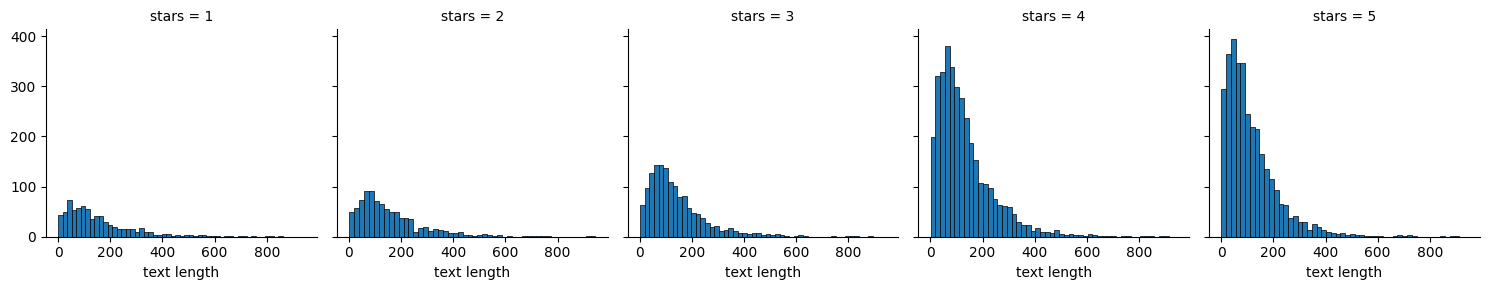

In [9]:
grid = sns.FacetGrid(col="stars", data=reviews_df)
plt.style.use('_mpl-gallery')
grid.map(plt.hist, 'text length', linewidth=0.5, edgecolor="black", bins= 50)

**Boxplot of text length for each star category.**

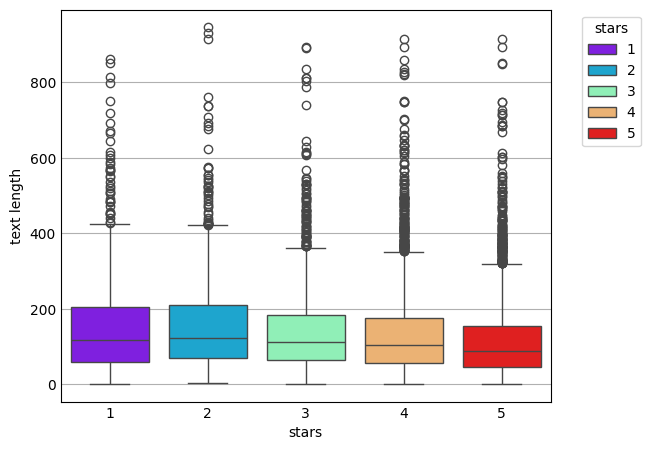

In [22]:
plt.figure(figsize=(5, 4))
plot = sns.boxplot(data=reviews_df, y='text length', x='stars', palette="rainbow", hue = 'stars')
# Move the legend outside the plot
sns.move_legend(plot, "upper left", bbox_to_anchor=(1.05, 1))

**Countplot of the number of occurrences for each type of star rating.**

<Axes: xlabel='stars', ylabel='count'>

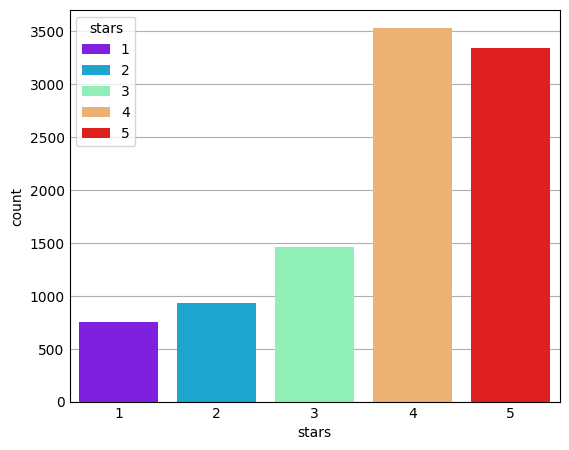

In [24]:
plt.figure(figsize=(5,4))
sns.countplot(data=reviews_df, x="stars", palette="rainbow", hue = 'stars')

----
### 3.2 Numerical Features Exploration

**Means of Numerical columns in the dataset**

In [12]:
means_df = reviews_df.drop(['business_id','user_id', 'text', 'review_id', 'date', 'type'], axis=1).groupby("stars").mean()
means_df

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,156.013351
2,0.719525,1.563107,0.875944,158.508091
3,0.788501,1.306639,0.694730,143.043806
4,0.954623,1.395916,0.670448,132.921441
5,0.944261,1.381780,0.608631,116.054840


**Correlation of columns**

In [13]:
means_df.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865650
useful,-0.743329,1.000000,0.894506,0.690255
funny,-0.944939,0.894506,1.000000,0.844066
text length,-0.865650,0.690255,0.844066,1.000000


**Heatmap of Correlation**

<Axes: >

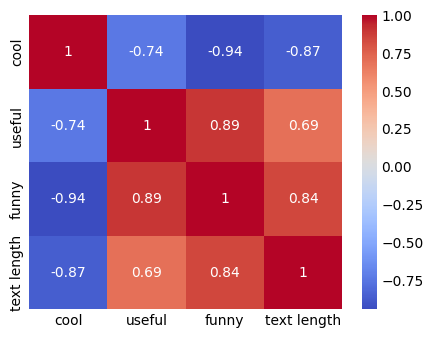

In [14]:
plt.figure(figsize=(4,3))
sns.heatmap(means_df.corr(), cmap="coolwarm", annot=True)

----
## 4. Predictive Modelling

### 4.1 Training and Testing data

In [79]:
yelp_class = reviews_df[(reviews_df['stars'] == 1) | (reviews_df['stars'] == 5)]

In [80]:
X = yelp_class['text']
y = yelp_class['stars']

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 4.2 Defining Data Pipeline

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [83]:
data_pipeline = Pipeline([
    ("Vectorizer", CountVectorizer()),
    ('Classifier', ComplementNB())
])

### 4.3 Model Training

In [84]:
data_pipeline.fit(X_train, y_train)

Pipeline(steps=[('Vectorizer', CountVectorizer()),
                ('Classifier', ComplementNB())])

### 4.4 Predictions and Evaluation

In [85]:
predictions = data_pipeline.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [86]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[170  58]
 [ 24 974]]
              precision    recall  f1-score   support

           1       0.88      0.75      0.81       228
           5       0.94      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.86      0.88      1226
weighted avg       0.93      0.93      0.93      1226



---
## 5. Conclusions and Recommendations


**With just MultinomialNB, an accuracy of 93% was achieved.**

---